In [ ]:
import pandas as pd
import re
from parser import get_details


[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/maximkim/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     /Users/maximkim/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [5]:
!curl -L -o updated-resume-dataset.zip https://www.kaggle.com/api/v1/datasets/download/jillanisofttech/updated-resume-dataset
!open updated-resume-dataset.zip

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100  382k  100  382k    0     0   764k      0 --:--:-- --:--:-- --:--:--  764k


In [11]:
data = pd.read_csv("UpdatedResumeDataSet.csv", encoding="utf-8")

In [ ]:
data.head()

,Category,Resume
0,Data Science,Skills * Programming Languages: Python (pandas...
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...
2,Data Science,"Areas of Interest Deep Learning, Control Syste..."
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...
4,Data Science,"Education Details \r\n MCA YMCAUST, Faridab..."


In [ ]:
data.shape

(962, 2)

In [ ]:
data.info

<bound method DataFrame.info of          Category                                             Resume
0    Data Science  Skills * Programming Languages: Python (pandas...
1    Data Science  Education Details \r\nMay 2013 to May 2017 B.E...
2    Data Science  Areas of Interest Deep Learning, Control Syste...
3    Data Science  Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...
4    Data Science  Education Details \r\n MCA   YMCAUST,  Faridab...
..            ...                                                ...
957       Testing  Computer Skills: â¢ Proficient in MS office (...
958       Testing  â Willingness to accept the challenges. â ...
959       Testing  PERSONAL SKILLS â¢ Quick learner, â¢ Eagerne...
960       Testing  COMPUTER SKILLS & SOFTWARE KNOWLEDGE MS-Power ...
961       Testing  Skill Set OS Windows XP/7/8/8.1/10 Database MY...

[962 rows x 2 columns]>

In [13]:
data.isnull().sum()

Category    0
Resume      0
dtype: int64

In [14]:
data.duplicated().sum()

np.int64(796)

In [15]:
data.drop_duplicates(keep='first', inplace=True)

In [57]:
data.shape

(166, 4)

Look at text and consider how we want to clean them

In [ ]:
i = 0
print(data["Resume"][0])

Skills * Programming Languages: Python (pandas, numpy, scipy, scikit-learn, matplotlib), Sql, Java, JavaScript/JQuery. * Machine learning: Regression, SVM, NaÃ¯ve Bayes, KNN, Random Forest, Decision Trees, Boosting techniques, Cluster Analysis, Word Embedding, Sentiment Analysis, Natural Language processing, Dimensionality reduction, Topic Modelling (LDA, NMF), PCA & Neural Nets. * Database Visualizations: Mysql, SqlServer, Cassandra, Hbase, ElasticSearch D3.js, DC.js, Plotly, kibana, matplotlib, ggplot, Tableau. * Others: Regular Expression, HTML, CSS, Angular 6, Logstash, Kafka, Python Flask, Git, Docker, computer vision - Open CV and understanding of Deep learning.Education Details 

Data Science Assurance Associate 

Data Science Assurance Associate - Ernst & Young LLP
Skill Details 
JAVASCRIPT- Exprience - 24 months
jQuery- Exprience - 24 months
Python- Exprience - 24 monthsCompany Details 
company - Ernst & Young LLP
description - Fraud Investigations and Dispute Services   Assur

In [125]:
from parser import get_details
from nltk.stem import PorterStemmer
ps = PorterStemmer()

def clean_text(text):
    details, text = get_details(text)
    # clean links
    text = re.sub(r"http\S+", " ", text)
    # remove all non ascii
    text = re.sub(r"[^\x00-\x7f]", " ", text)
    # remove extra whitespace
    text = re.sub(r"\s+", " ", text)
    return text


In [126]:
data["Clean"] = data["Resume"].apply(clean_text)
data

,Category,Resume,Clean,Transform,Label
0,Data Science,Skills * Programming Languages: Python (pandas...,Skills * Programming Languages: Python (pandas...,skills programming languages python pandas num...,6
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...,Education Details May 2013 to May 2017 B.E UIT...,education details may 2013 may 2017 data scien...,6
2,Data Science,"Areas of Interest Deep Learning, Control Syste...","Areas of Interest Deep Learning, Control Syste...",areas interest deep learning control system de...,6
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...,Skills R Python SAP HANA Tableau SAP HANA SQL ...,skills r python sap hana tableau sap hana sql ...,6
4,Data Science,"Education Details \r\n MCA YMCAUST, Faridab...","Education Details MCA YMCAUST, Faridabad, Hary...",education details mca ymcaust faridabad haryan...,6
...,...,...,...,...,...
894,Testing,Computer Skills: â¢ Proficient in MS office (...,Computer Skills: Proficient in MS office (Word...,computer skills proficient ms office word basi...,23
895,Testing,â Willingness to accept the challenges. â ...,Willingness to accept the challenges. Positiv...,willingness accept challenges positive thinkin...,23
896,Testing,"PERSONAL SKILLS â¢ Quick learner, â¢ Eagerne...","PERSONAL SKILLS Quick learner, Eagerness to le...",personal skills quick learner eagerness learn ...,23
897,Testing,COMPUTER SKILLS & SOFTWARE KNOWLEDGE MS-Power ...,COMPUTER SKILLS & SOFTWARE KNOWLEDGE MS-Power ...,computer skills software knowledge point ms of...,23


In [141]:
import nltk
nltk.download("stopwords")
nltk.download("punkt_tab")

def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)
    # keep only alpha numeric
    # text = [word for word in text if word.isalnum()]
    stopwords = nltk.corpus.stopwords.words('english')
    # remove unimportant stop words like "the" or "to"
    text = [word for word in text if word not in stopwords]
    # only get the stem "eating" -> eat
    # text = [ps.stem(word) for word in text]
    text = ' '.join(text)
    return text

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/maximkim/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     /Users/maximkim/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


In [128]:
data["Transform"] = data["Clean"].apply(transform_text)
data

,Category,Resume,Clean,Transform,Label
0,Data Science,Skills * Programming Languages: Python (pandas...,Skills * Programming Languages: Python (pandas...,skills programming languages python pandas num...,6
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...,Education Details May 2013 to May 2017 B.E UIT...,education details may 2013 may 2017 data scien...,6
2,Data Science,"Areas of Interest Deep Learning, Control Syste...","Areas of Interest Deep Learning, Control Syste...",areas interest deep learning control system de...,6
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...,Skills R Python SAP HANA Tableau SAP HANA SQL ...,skills r python sap hana tableau sap hana sql ...,6
4,Data Science,"Education Details \r\n MCA YMCAUST, Faridab...","Education Details MCA YMCAUST, Faridabad, Hary...",education details mca ymcaust faridabad haryan...,6
...,...,...,...,...,...
894,Testing,Computer Skills: â¢ Proficient in MS office (...,Computer Skills: Proficient in MS office (Word...,computer skills proficient ms office word basi...,23
895,Testing,â Willingness to accept the challenges. â ...,Willingness to accept the challenges. Positiv...,willingness accept challenges positive thinkin...,23
896,Testing,"PERSONAL SKILLS â¢ Quick learner, â¢ Eagerne...","PERSONAL SKILLS Quick learner, Eagerness to le...",personal skills quick learner eagerness learn ...,23
897,Testing,COMPUTER SKILLS & SOFTWARE KNOWLEDGE MS-Power ...,COMPUTER SKILLS & SOFTWARE KNOWLEDGE MS-Power ...,computer skills software knowledge point ms of...,23


In [142]:
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

le = LabelEncoder()
data["Label"] = le.fit_transform(data["Category"])

resumes = data["Clean"].values
categories = data["Label"].values

# vectorize resume data by vocab by TF-IDF strategy
vectorizer = TfidfVectorizer(sublinear_tf=True, stop_words="english")
vectorizer.fit(resumes)
features = vectorizer.transform(resumes)

X_train, X_test, y_train, y_test = train_test_split(
    features,
    categories,
    test_size=0.2,
    shuffle=True,
    stratify=categories,
    random_state=2024,
)

# choose highest freq label in neighbors
model = KNeighborsClassifier()
model.fit(X_train, y_train)

KNeighborsClassifier()

In [143]:
from sklearn.metrics import classification_report

print(f"train accuracy {model.score(X_train, y_train)}")
print(f"test accuracy {model.score(X_test, y_test)}")
print(f"classifying {model}")

pred = model.predict(X_test)
print(classification_report(y_test, pred, zero_division=True))

train accuracy 0.8712121212121212
test accuracy 0.8823529411764706
classifying KNeighborsClassifier()
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         2
           1       1.00      1.00      1.00         1
           2       1.00      1.00      1.00         2
           3       1.00      1.00      1.00         1
           4       1.00      1.00      1.00         1
           5       1.00      1.00      1.00         1
           6       1.00      1.00      1.00         2
           7       1.00      1.00      1.00         2
           8       1.00      0.50      0.67         2
           9       1.00      1.00      1.00         1
          10       1.00      1.00      1.00         1
          11       0.50      1.00      0.67         1
          12       1.00      1.00      1.00         2
          13       1.00      1.00      1.00         1
          14       1.00      1.00      1.00         1
          15       0.60      1.00

In [145]:
from wordcloud import WordCloud
wc = WordCloud(width=800, height=400, max_words=100, background_color='white').generate(' '.join(data['Transform']))

In [159]:
print(data["Category"].unique())

['Data Science' 'HR' 'Advocate' 'Arts' 'Web Designing'
 'Mechanical Engineer' 'Sales' 'Health and fitness' 'Civil Engineer'
 'Java Developer' 'Business Analyst' 'SAP Developer' 'Automation Testing'
 'Electrical Engineering' 'Operations Manager' 'Python Developer'
 'DevOps Engineer' 'Network Security Engineer' 'PMO' 'Database' 'Hadoop'
 'ETL Developer' 'DotNet Developer' 'Blockchain' 'Testing']


Text(0.5, 1.0, 'Most common words in Java Developer resumes')

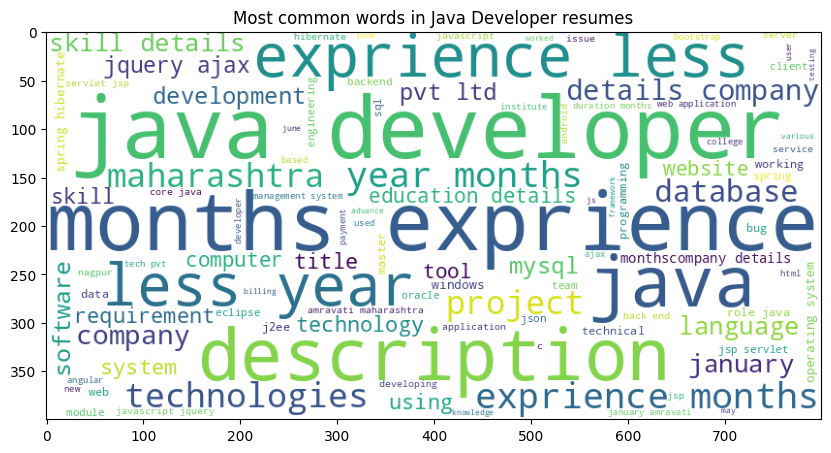

In [162]:
import matplotlib.pyplot as plt
job = "Java Developer"
ham_wc = wc.generate(' '.join(data[data['Category'] == job]['Transform']))
plt.figure(figsize=(10, 6))
plt.imshow(ham_wc)
plt.title('Most common words in ' + job + ' resumes')